# Decision Tree

## 라이브러리

In [1]:
import numpy as np
import pandas as pd
import pickle
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from graphviz import Source
from IPython.display import SVG

## git push

In [2]:
file_exist = !cat .gitignore
print(file_exist)

['#Every this is None', '/*', '', '#Add file', '', '', '!/2_Decision_tree.ipynb', '!/data', '!/data/diagnosis.data', '!/model', '!/model/prac001.model']


In [3]:
git_push_list = ["2_Decision_tree.ipynb", "data", "data/diagnosis.data","model", "model/prac001.model"]
for git in git_push_list:
    temp = !cat .gitignore | grep $git
    if len(temp) == 0:
        push = "!/" + git
        !echo $push >> .gitignore

## 데이터 전처리

In [4]:
datapath = "~/ML2021/data/diagnosis.data"

original_data = pd.read_csv(datapath, sep = "\t", encoding = "utf-16", names = ["temperature","nausea","lumbar_pain","urine_pushing","micturition_pains","burning_of_urethra","inflamation","nephritis"])

1. 칼럼 temperature 에 , 를 . 으로 수정이 필요함.
2. 다른 칼럼 데이터에 no, yes를 0,1로 수정이 필요함.

In [5]:
original_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


apply(lambda)를 사용하여 , 를 . 으로 수정

In [6]:
original_data['temperature'] = original_data['temperature'].apply(lambda x: x.replace(',','.'))

original_data 에서 dicted_data로 수정하며 preprocessing.LabelEncoder()를 <br>
이용하여 0과 1로 데이터 변환

In [7]:
dicted_data = original_data.copy()
tmp = ['nausea','lumbar_pain','urine_pushing','micturition_pains','burning_of_urethra','inflamation','nephritis']
les = {}

for x in tmp:
    les[x] = preprocessing.LabelEncoder()
    dicted_data[x] = les[x].fit_transform(original_data[x])
dicted_data.head()

,temperature,nausea,lumbar_pain,urine_pushing,micturition_pains,burning_of_urethra,inflamation,nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


## Decision Model 생성

X : temperature 만 feature로 지정, 데이터 타입을 위해 이 방식을 사용해야 함. <br>
Y : 예측할 label를 'inflammation' 으로 지정 <br>
<br>
min_saples_split : 노드에서 자식 노드로 분할할 때 최소의 데이터 갯수를 의미.<br>
즉, 20개 미만은 분할이 안됨.<br>
너무 작게 잡아버리면 데이터에 완벽하게 적응하여 오버피팅 발생 <br>
<br>
random_state : 랜덤 시드 값 <br>

In [8]:
features = ['temperature']
x = dicted_data[features] # 데이터 타입을 위해 사용.
y = dicted_data['inflamation']
model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)

In [9]:
x.head()

,temperature
0,35.5
1,35.9
2,35.9
3,36.0
4,36.0


In [10]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: inflamation, dtype: int64

In [11]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

현재 라벨 클래스와 Decision_tree 그래프 출력

['no' 'yes']


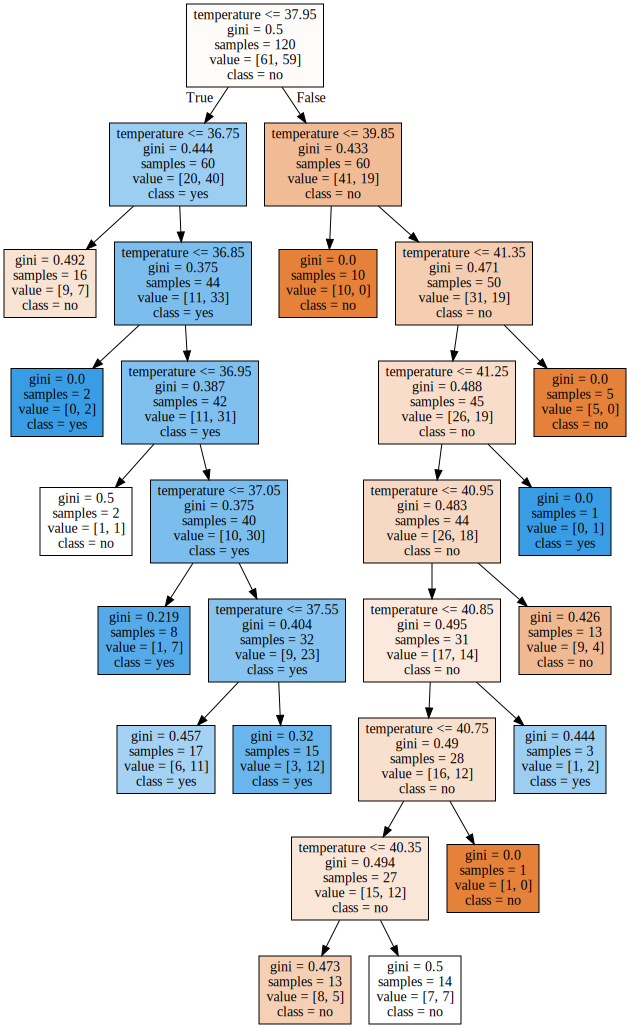

In [12]:
inflamation_labels = les['inflamation'].classes_
print(inflamation_labels)

graph = Source(tree.export_graphviz(model, out_file = None, feature_names = features, class_names = inflamation_labels, filled = True))
display(SVG(graph.pipe(format = "svg")))

In [13]:
pred_y = model.predict(x)
pred_y_prob = model.predict_proba(x)
print(np.shape(pred_y))
print(np.shape(pred_y_prob))

(120,)
(120, 2)


pred_y_prob 가 확률, 그 확률에 기반하여 pred_y가 도출됨. <br>
y는 실제 정답 값

In [14]:
print("정답 : ", y[0])
print("예측 : ", pred_y[0])
print("확률 : ", pred_y_prob[0])
print(model.classes_)

정답 :  0
예측 :  0
확률 :  [0.5625 0.4375]
[0 1]


score를 너무 맹신해서는 안됨.

In [15]:
mean_accuracy = model.score(x,y)
print(mean_accuracy)

0.7083333333333334


In [16]:
y = dicted_data['inflamation']

features = ['temperature','nausea','urine_pushing','burning_of_urethra','lumbar_pain','micturition_pains']
x = dicted_data[features]

model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)

정확도가 100%???? -> score가 100일뿐 검증 필요해 보임.

In [17]:
model.fit(x,y)
mean_accuracy = model.score(x,y)
print(mean_accuracy)

1.0


트리 모양 출력 <br>
모든 left node 가 pure 함. <br>
-> 즉 학습 데이터에 대해서는 완벽하게 학습 됨.

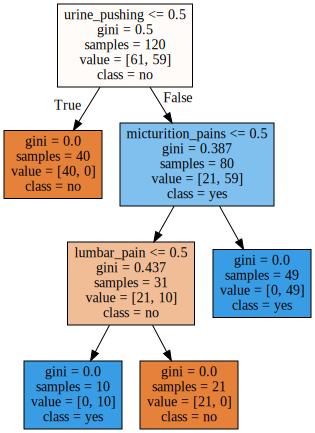

In [18]:
graph = Source(tree.export_graphviz(model, out_file = None, feature_names = features, class_names = inflamation_labels, filled = True))
display(SVG(graph.pipe(format = "svg")))

최종 노드 데이터 중요성 <br>
-> explain able 하다. 설명이 가능하다. 

In [19]:
print(features)
print(model.feature_importances_)

['temperature', 'nausea', 'urine_pushing', 'burning_of_urethra', 'lumbar_pain', 'micturition_pains']
[0.         0.         0.48360656 0.         0.22586919 0.29052425]


데이터를 학습용, 테스트용으로 나누어 보지 않음. <br>
train_test_split -> test_size : 데이터 세트 분할

In [20]:
features = ['temperature','urine_pushing','lumbar_pain','nausea','micturition_pains','burning_of_urethra']
train_d, test_d = train_test_split(dicted_data, test_size = 0.1)

train_x = train_d[features]
train_y = train_d['inflamation']

test_x = test_d[features]
test_y = test_d['inflamation']

model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)
model.fit(train_x,train_y)

mean_accuracy_for_train = model.score(train_x, train_y)
print(mean_accuracy_for_train)

mean_accuracy_for_test = model.score(test_x, test_y)
print(mean_accuracy_for_test)

1.0
1.0


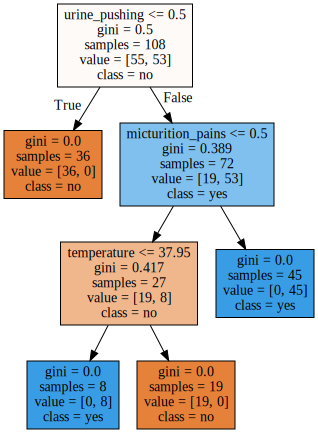

In [21]:
graph = Source(tree.export_graphviz(model, out_file = None, feature_names = features, class_names = inflamation_labels, filled = True))
display(SVG(graph.pipe(format = "svg")))

In [22]:
train_d, test_d = train_test_split(dicted_data, test_size = 0.2)
model = DecisionTreeClassifier(min_samples_split = 20, random_state = 99)
model.fit(train_x,train_y)

mean_accuracy_for_train = model.score(train_x, train_y)
print(mean_accuracy_for_train)

mean_accuracy_for_test = model.score(test_x, test_y)
print(mean_accuracy_for_test)

1.0
1.0


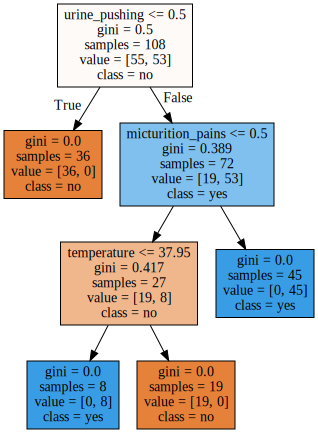

In [23]:
graph = Source(tree.export_graphviz(model, out_file = None, feature_names = features, class_names = inflamation_labels, filled = True))
display(SVG(graph.pipe(format = "svg")))

In [24]:
modelpath = './model/prac001.model'
if os.path.exists('model') == False:
    !mkdir model
with open(modelpath,'wb') as f:
    pickle.dump(model,f)

In [25]:
with open(modelpath,'rb') as f:
    model_loaded = pickle.load(f)
mean_accuracy_for_test = model_loaded.score(test_x,test_y)
print(mean_accuracy_for_test)

1.0
